# Evaluate Structured Features

Adapted from [ayushnoori/ps2-lab](https://github.com/ayushnoori/ps2-lab) on GitHub.

In [8]:
# standard imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# # molecular manipulation
# from rdkit import Chem, DataStructs
# from rdkit.Chem import AllChem
# from rdkit.Chem import Descriptors

# clustering
from sklearn.cluster import AgglomerativeClustering

# path manipulation
from pathlib import Path

# import custom modules
import sys
sys.path.append('../..')
import project_config

Next, we read the Meng *et al*. dataset into a `pandas` data frame (Meng *et al.*, 2021). This dataset, known as the Blood-Brain Barrier Database (B3DB) was compiled from more than 50 published resoures and contains BBB permeability data for 1058 compounds. Each row in the date frame corresponds to a unique compound and each column corresponds to a chemical descriptor or logBB value. 

In [2]:
# read in data
data = pd.read_csv(project_config.DATA_DIR / 'B3DB_regression.tsv', sep='\t')
data.head()

,NO.,compound_name,IUPAC_name,SMILES,CID,logBB,Inchi,reference,group,comments
0,1,moxalactam,7-[[2-carboxy-2-(4-hydroxyphenyl)acetyl]amino]...,CN1C(=NN=N1)SCC2=C(N3C(C(C3=O)(NC(=O)C(C4=CC=C...,3889.0|,-2.52,InChI=1S/C20H20N6O9S/c1-25-19(22-23-24-25)36-8...,R25|,A,NaN
1,2,schembl614298,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-7-hydro...",CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)OC6[C@...,18595497.0|,-2.15,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-4-12(25)2...,R25|,A,NaN
2,3,morphine-6-glucuronide,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-9-hydro...",CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@...,9847115.0|,-2.09,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-5-13(31-2...,R25|,A,NaN
3,4,2-[4-(5-bromo-3-methylpyridin-2-yl)butylamino]...,2-[4-(5-bromo-3-methylpyridin-2-yl)butylamino]...,CC1=NC=C(C=C1)CC2CNC(NC2=O)NCCCCC3=NC=C(C=C3C)Br,74041479.0|,-1.88,InChI=1S/C21H28BrN5O/c1-14-9-18(22)13-25-19(14...,R35|,A,NaN
4,5,NaN,NaN,c1(c2c3n(c4c(C(N(C)C3)=O)c(Cl)ccc4)cn2)noc(C(O...,nan|,-1.82,"InChI=1S/C16H14ClN5O4/c1-16(24,25)15-19-13(20-...",R35|,A,NaN


Convert molecule to SMILES.

Compound Name:  moxalactam


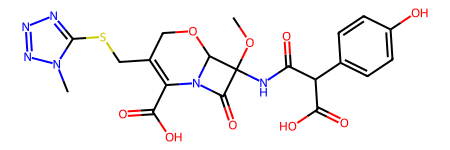

In [3]:
# get molecule from SMILES
data['mol'] = data['SMILES'].apply(Chem.MolFromSmiles)

# visualize first molecule
print("Compound Name: ", data['compound_name'].iloc[0])

# from rdkit.Chem import Draw
mol = data['mol'].iloc[0]
img = Draw.MolToImage(mol, size=(2000, 2000))
img.save(project_config.RESULTS_DIR / "moxalactam.png", dpi=(2000, 2000)) 

data['mol'].iloc[0]

In [ ]:
# read in dataset file
excape_db_path = project_config.DATA_DIR / "pubchem.chembl.dataset4publication_inchi_smiles_v2.tsv"
excape_db = pd.read_csv(excape_db_path, sep='\t', header=0, index_col=False)
excape_db.head()

,Ambit_InchiKey,Original_Entry_ID,Entrez_ID,Activity_Flag,pXC50,DB,Original_Assay_ID,Tax_ID,Gene_Symbol,Ortholog_Group,InChI,SMILES,updated
0,AAAAZQPHATYWOK-YRBRRWAQNA-N,11399331,2064,A,7.19382,pubchem,248914,9606,ERBB2,1346,InChI=1/C32H29ClN6O3S/c1-4-41-28-16-25-22(15-2...,ClC=1C=C(NC=2C=3C(N=CC2C#N)=CC(OCC)=C(NC(=O)/C...,NaN
1,AAAAZQPHATYWOK-YRBRRWAQNA-N,CHEMBL175513,1956,A,6.73000,chembl20,312997,9606,EGFR,1260,InChI=1/C32H29ClN6O3S/c1-4-41-28-16-25-22(15-2...,C1=2C(=C(C#N)C=NC1=CC(=C(C2)NC(/C=C/CN(C)C)=O)...,NaN
2,AAABHMIRDIOYOK-NPVYFSBINA-N,CHEMBL1527551,10919,N,4.55000,chembl20,737344,9606,EHMT2,6822,InChI=1/C18H14N6O3/c1-23-10-15(24(26)27)16(22-...,O=C(NC=1C=C2N=C(NC2=CC1)C=3C=CC=CC3)C4=NN(C=C4...,NaN
3,AAABHMIRDIOYOK-NPVYFSBINA-N,CHEMBL1527551,19885,A,5.35000,chembl20,688759,10090,RORC,3770,InChI=1/C18H14N6O3/c1-23-10-15(24(26)27)16(22-...,O=C(NC=1C=C2N=C(NC2=CC1)C=3C=CC=CC3)C4=NN(C=C4...,NaN
4,AAABHMIRDIOYOK-NPVYFSBINA-N,CHEMBL1527551,216,N,4.40000,chembl20,688238,9606,ALDH1A1,143,InChI=1/C18H14N6O3/c1-23-10-15(24(26)27)16(22-...,O=C(NC=1C=C2N=C(NC2=CC1)C=3C=CC=CC3)C4=NN(C=C4...,NaN


Next, we use the RDKit library to calculate molecular features from SMILES strings. We calculate the following molecular features for each compound:
* Average molecular weight, which reflects the distribution of isotopes of the molecule's atoms.
* Exact molecular weight, which gives the molecular weight of the most common isotopes of each atom in the molecule.
* Average molecular weight excluding hydrogens.
* Number of hydrogen bond acceptors.
* Number of hydrogen bond donors.
* Number of heavy atoms.
* Number of aromatic rings.
* Number of total rings.
* Number of rotatable bonds.

In [4]:
# to calculate all 210 descriptors
# descriptors = data['mol'].apply(lambda x: pd.Series(Chem.Descriptors.CalcMolDescriptors(x)))

# get average molecular weight (MolWt)
data['mol_wt'] = data['mol'].apply(lambda x: Descriptors.MolWt(x))

# get exact molecular weight (ExactMolWt)
data['exact_mol_wt'] = data['mol'].apply(lambda x: Descriptors.ExactMolWt(x))

# get average molecular weight ignoring hydrogens (HeavyAtomMolWt)
data['heavy_atom_mol_wt'] = data['mol'].apply(lambda x: Descriptors.HeavyAtomMolWt(x))

# get average number of hydrogen bond acceptors (NumHAcceptors)
data['num_h_acceptors'] = data['mol'].apply(lambda x: Descriptors.NumHAcceptors(x))

# get average number of hydrogen bond donors (NumHDonors)
data['num_h_donors'] = data['mol'].apply(lambda x: Descriptors.NumHDonors(x))

# get number of heavy atoms (HeavyAtomCount)
data['heavy_atom_count'] = data['mol'].apply(lambda x: Descriptors.HeavyAtomCount(x))

# get number of aromatic rings (NumAromaticRings)
data['num_aromatic_rings'] = data['mol'].apply(lambda x: Descriptors.NumAromaticRings(x))

# get number of rings (NumRings)
data['num_rings'] = data['mol'].apply(lambda x: Descriptors.RingCount(x))

# get number of rotatable bonds (NumRotatableBonds)
data['num_rotatable_bonds'] = data['mol'].apply(lambda x: Descriptors.NumRotatableBonds(x))

# show first 5 rows of data
data.head()

,NO.,compound_name,IUPAC_name,SMILES,CID,logBB,Inchi,reference,group,comments,mol,mol_wt,exact_mol_wt,heavy_atom_mol_wt,num_h_acceptors,num_h_donors,heavy_atom_count,num_aromatic_rings,num_rings,num_rotatable_bonds
0,1,moxalactam,7-[[2-carboxy-2-(4-hydroxyphenyl)acetyl]amino]...,CN1C(=NN=N1)SCC2=C(N3C(C(C3=O)(NC(=O)C(C4=CC=C...,3889.0|,-2.52,InChI=1S/C20H20N6O9S/c1-25-19(22-23-24-25)36-8...,R25|,A,NaN,<rdkit.Chem.rdchem.Mol object at 0x28a92bca0>,520.480,520.101247,500.320,12,4,36,2,4,9
1,2,schembl614298,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-7-hydro...",CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)OC6[C@...,18595497.0|,-2.15,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-4-12(25)2...,R25|,A,NaN,<rdkit.Chem.rdchem.Mol object at 0x28a92bd10>,461.467,461.168581,434.251,9,5,33,1,6,3
2,3,morphine-6-glucuronide,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-9-hydro...",CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@...,9847115.0|,-2.09,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-5-13(31-2...,R25|,A,NaN,<rdkit.Chem.rdchem.Mol object at 0x28a92bdf0>,461.467,461.168581,434.251,9,5,33,1,6,3
3,4,2-[4-(5-bromo-3-methylpyridin-2-yl)butylamino]...,2-[4-(5-bromo-3-methylpyridin-2-yl)butylamino]...,CC1=NC=C(C=C1)CC2CNC(NC2=O)NCCCCC3=NC=C(C=C3C)Br,74041479.0|,-1.88,InChI=1S/C21H28BrN5O/c1-14-9-18(22)13-25-19(14...,R35|,A,NaN,<rdkit.Chem.rdchem.Mol object at 0x28a92bd80>,446.393,445.147723,418.169,5,3,28,2,3,8
4,5,NaN,NaN,c1(c2c3n(c4c(C(N(C)C3)=O)c(Cl)ccc4)cn2)noc(C(O...,nan|,-1.82,"InChI=1S/C16H14ClN5O4/c1-16(24,25)15-19-13(20-...",R35|,A,NaN,<rdkit.Chem.rdchem.Mol object at 0x28a92b8b0>,375.772,375.073432,361.660,8,2,26,3,4,2


We visualize the relationship between molecular weight and logBB. Note that the logBB is the logarithm of the ratio of the concentration of the compound in the brain to the concentration in the plasma. 
$$\log{BB} = \log{\frac{C_{brain}}{C_{blood}}}$$

If the logBB is positive, then a compound is BBB-permeable and vice versa.

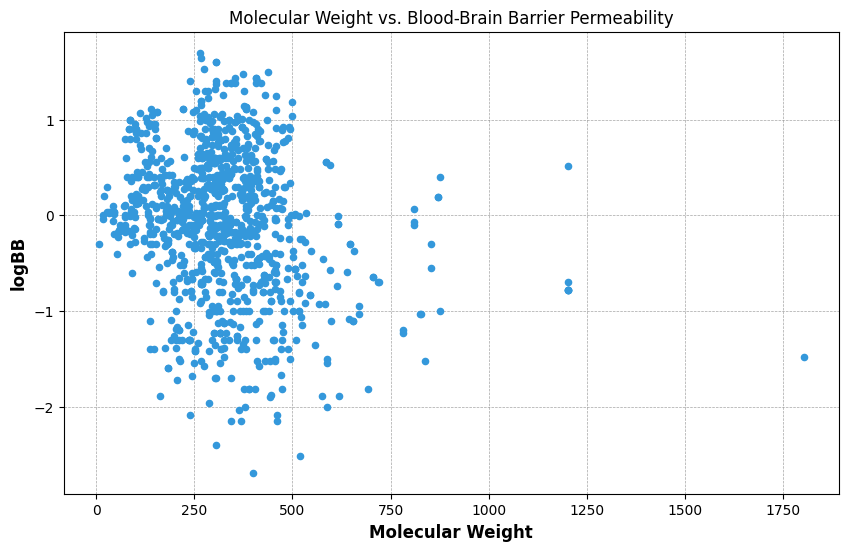

In [5]:
# from Code.multisynth.binding_affinity.plot_utils import make_scatter

# create function to plot data
def make_scatter(data, x, y, xlabel, ylabel, title = None, color = '#3498db'):

    # create title
    if title is None:
        title = xlabel + ' vs. ' + ylabel

    # set figure dimensions
    plt.figure(figsize=(10, 6))

    # plot data points
    plt.scatter(data[x], data[y], s=20, color=color)

    # set title and axis labels
    plt.title(title)
    plt.xlabel(xlabel, fontweight='bold', size=12)
    plt.ylabel(ylabel, fontweight='bold', size=12)

    # add a gray dashed grid in the background
    plt.grid(axis = "both", color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.gca().set_axisbelow(True)

    # save plot
    plt.savefig(project_config.RESULTS_DIR / str(xlabel + '_vs_' + ylabel + '.png'), dpi=600, bbox_inches='tight')

    # return plot
    return plt

# plot molecular weight vs. logBB
plt = make_scatter(data, 'mol_wt', 'logBB', 'Molecular Weight', 'logBB', title = 'Molecular Weight vs. Blood-Brain Barrier Permeability')
plt.show()

We use the RDKit library to calculate Morgan fingerprints for each compound. Morgan fingerprints, also known as extended-connectivity fingerprint ECFP4, are a type of circular fingerprint, which encode the local chemical environment of a molecule by iteratively applying a hashing function to a molecule's substructures. Here, we use a radius of 2, which means that the hashing function is applied to all substructures within 2 bonds of each atom in the molecule, and a bit length of 1024.   

In [6]:
# compute fingerprints
data['fingerprints'] = data['mol'].apply(lambda x: Chem.AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=1024))

# convert to numpy arrays
np_fingerprints = []
for fp in data['fingerprints']:
    array = np.zeros((0, ), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, array)
    np_fingerprints.append(array)